# Analyse de 5 assets financiers

Desormais, grâce aux nombreux indicateurs techniques établis lors de la phase de transformation des données, nous sommes en mesure de répondre aux problématiques initiales et de produire une analyse financière assez crédible. 

Cette étude se décomposera en plusieurs sections, chacune illustrant une étape clé de l'interprétation des données afin d'offrir une vision complète de la performance et de la dynamique des actifs sélectionnés.

## Rendement / Risque 

Avant tout investissement, il est crucial de mesurer si la rentabilité attendue offre une rémunération du risque adéquate par rapport à la volatilité observée sur l'actif.

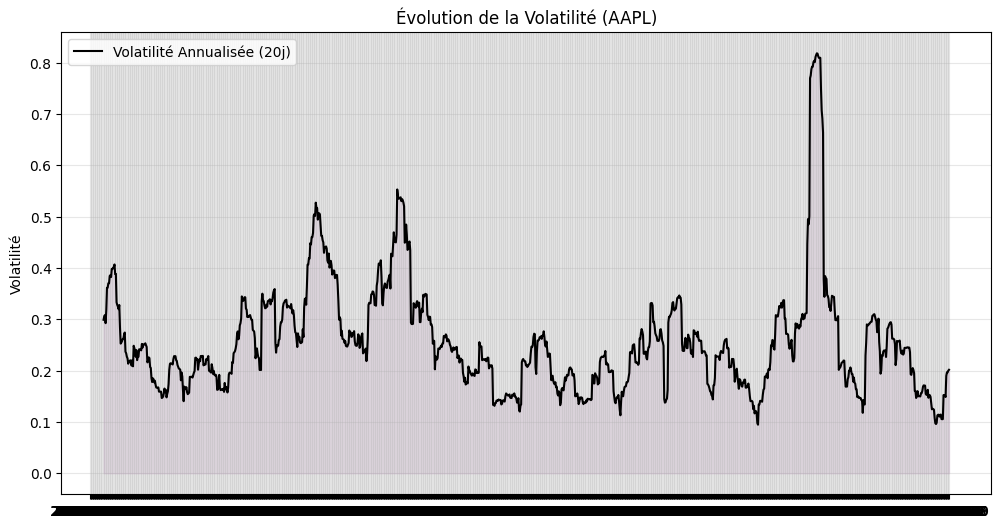

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd

df = pd.read_csv(f"./data/processed/AAPL_clean.csv") 
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], color='black', label='Volatilité Annualisée (20j)')
plt.fill_between(df['Date'], df['Volatility'], 0, color='purple', alpha=0.1)

plt.title('Évolution de la Volatilité (AAPL)')
plt.ylabel('Volatilité')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

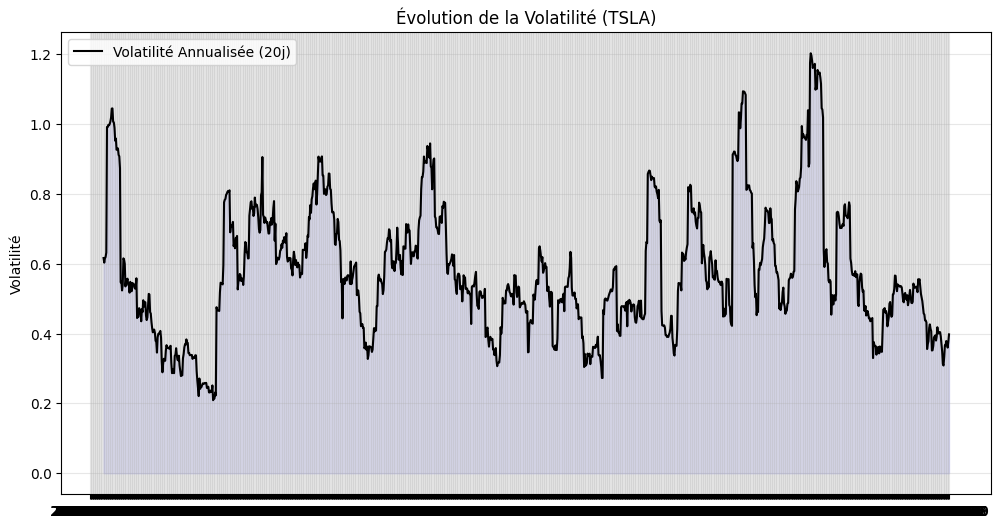

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd

df = pd.read_csv(f"./data/processed/TSLA_clean.csv") 
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], color='black', label='Volatilité Annualisée (20j)')
plt.fill_between(df['Date'], df['Volatility'], 0, color='blue', alpha=0.1)

plt.title('Évolution de la Volatilité (TSLA)')
plt.ylabel('Volatilité')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

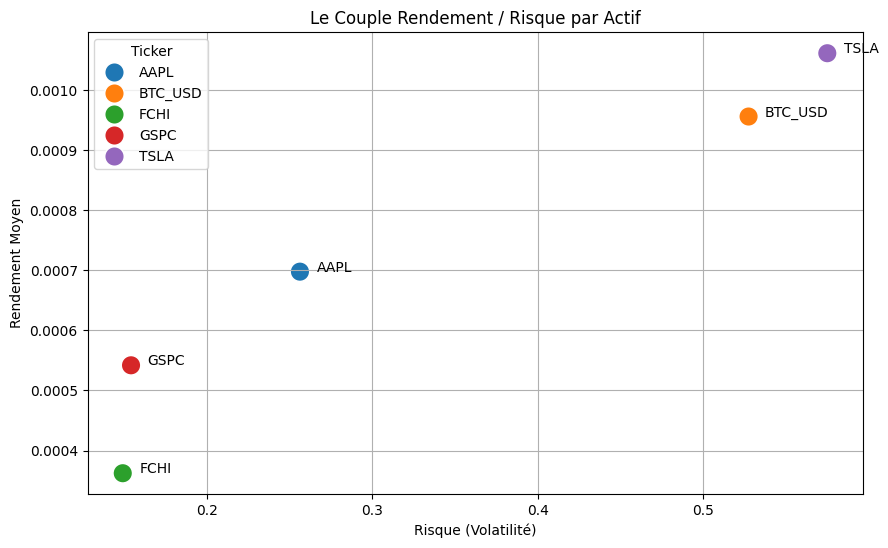

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

tickers = ["^FCHI", "^GSPC", "TSLA", "AAPL", "BTC-USD"]
all_df_assets = []
for t in tickers:
    clean_name = t.replace('^','').replace('-','_')
    temp_df = pd.read_csv(f"./data/processed/{clean_name}_clean.csv") 
    temp_df['Ticker'] = clean_name
    
    all_df_assets.append(temp_df)

df_all = pd.concat(all_df_assets, ignore_index=True)

summary = df_all.groupby('Ticker').agg({
    'Daily_Yield': 'mean',
    'Volatility': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=summary, x='Volatility', y='Daily_Yield', hue='Ticker', s=200)

for i in range(summary.shape[0]):
    plt.text(summary.Volatility[i]+0.01, summary.Daily_Yield[i], summary.Ticker[i])

plt.title('Le Couple Rendement / Risque par Actif')
plt.xlabel('Risque (Volatilité)')
plt.ylabel('Rendement Moyen')
plt.grid(True)
plt.show()

On peut observer un duel de performance entre TSLA et BTC_USD. TSLA est non seulement plus rentable que BTC_USD, mais aussi plus volatile. Il est donc plus pertinent, pour un investisseur qui est prêt à accepter un haut risque, de miser sur Tesla.

Le plus intéressant, qui saute aux yeux, est le risque quasi identique que partagent GSPC et FCHI. Une volatilité qui se vaut, mais un rendement deux fois plus élevé pour le S&P 500. On peut justifier ce résultat par la supériorité du marché américain face au marché français.

AAPL, quant à lui, est le bon compromis entre les actifs risqués et les actifs prudents. Pour deux fois plus de risque (face au GSPC), on peut supposer un rendement qui, lui aussi, est deux fois supérieur.